# 1.导库，获取数据

In [97]:
import scorecardpy as sc
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
import scipy
import scikitplot as skplt

In [2]:
data = pd.read_csv('./data/rankingcard.csv',index_col = 0)

In [3]:
data.shape

(150000, 11)

In [4]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 2.探索数据与数据预处理


## 2.1去除重复值

In [5]:
#去除重复值
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtypes: fl

In [6]:
#删除之后一定是要恢复索引
data.reset_index(drop=True,inplace=True)
#data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [7]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 2.2 填补缺失值

In [8]:
#均值填补
#data.isna().sum()/data.shape[0]
data.isna().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [9]:
data['NumberOfDependents'].fillna(int(data['NumberOfDependents'].mean()),inplace=True)

In [10]:
data.isna().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [11]:
#随机森林
#填补函数
def fill_missing_rf(x,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    :param x: 要填补的特征矩阵
    :param y: 完整的，没有缺失值的标签（原有标签）
    :param to_fill: 要填补的特征
    :return: 缺失填补后的特征
    """
    #构建新特征矩阵和标签
    df = x.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns!=to_fill],pd.DataFrame(y)],axis=1)

    #找出训练集和测试集
    y_train = fill[fill.notnull()]
    y_test  = fill[fill.isnull()]
    x_train = df.iloc[y_train.index,:]
    x_test = df.iloc[y_test.index,:]

    #使用随机森林填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr.fit(x_train,y_train)
    yprdict = rfr.predict(x_test)

    return yprdict

In [12]:
x = data.iloc[:,1:]
y = data['SeriousDlqin2yrs']
ypredict = fill_missing_rf(x,y,'MonthlyIncome')

In [13]:
#确认结果合理，就将数据覆盖
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = ypredict

In [14]:
data.isnull().mean()

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

## 2.3描述性统计处理异常值

In [15]:
df_describe = data.describe([0.01,0.1,0.25,.5,.75,.9]).T

In [16]:
(data['age']==0).sum()
data = data[data['age']!=0]
data = data[data.loc[:,"NumberOfTimes90DaysLate"]<90]

In [17]:
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

## 2.5样本不均衡问题

In [18]:
#标签分布
x = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()
n_sample = x.shape[0]
n1_sample = y.value_counts()[1]
n0_sample = y.value_counts()[0]
print(f'样本个数:%d;\n1占%.2f%%;\n0占%.2f%%'%(n_sample,n1_sample*100/n_sample,n0_sample*100/n_sample))
#print('样本个数:{:d};\n1占{:.2%};\n0占{:.2%}'.format(n_sample,n1_sample/n_sample,n0_sample/n_sample))

样本个数:149165;
1占6.62%;
0占93.38%


In [19]:
#上采样 方法平衡样本【不断向上采样平衡样本】
#重复采样样本量少的部分，以数据量多的一方的样本数量为标准，把样本数量较少的类的样本数量生成和样本数量多的一方相同

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)#实例化
x,y = sm.fit_resample(x,y) #返回已经上采样完毕后的特征矩阵和标签
n_sample = x.shape[0]
pd.Series(y).value_counts()
n1_sample = pd.Series(y).value_counts()[1]
n0_sample = pd.Series(y).value_counts()[0]
print('样本总数为{:d};\n1占{:.2%};\n2占{:.2%}\n'.format(n_sample,n1_sample/n_sample,n0_sample/n_sample))

样本总数为278584;
1占50.00%;
2占50.00%



# 3 特征筛选

## 3.1 方差为0的特征删除

In [20]:
df_describe

,count,mean,std,min,1%,10%,25%,50%,75%,90%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,329664.0
MonthlyIncome,149391.0,5426.346349,13265.838252,0.0,0.0,0.180000,1800.000000,4417.000000,7416.000000,10800.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,98.0


In [21]:
varnum = [x for x in df_describe[df_describe["std"] !=0].index]

In [22]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## 3.2 相关性剔除；剔除规则iv较小

<Axes: >

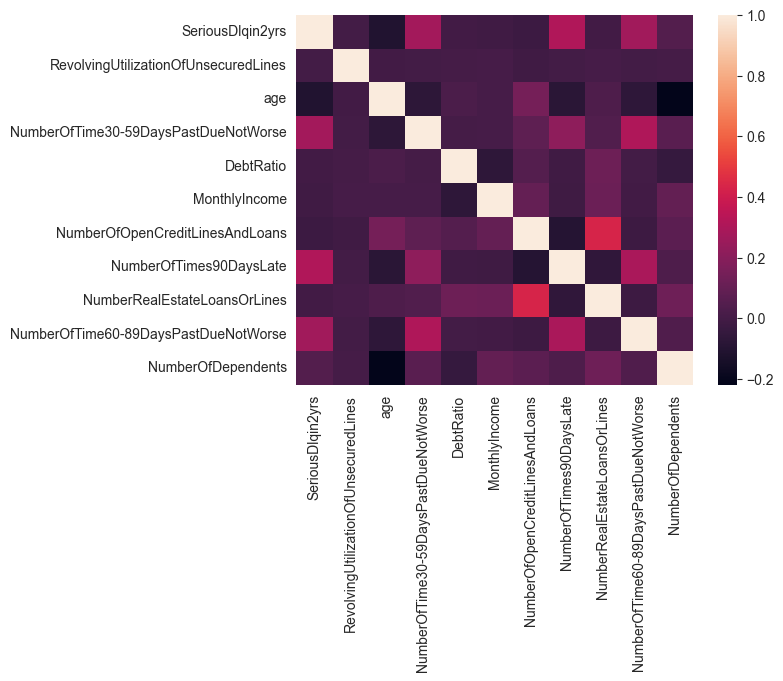

In [23]:
import seaborn as sns
import scorecardpy as sc
sns.heatmap(data.corr())

In [24]:
#剔除两两相关变量中iv较低者
def get_sc_iv(df_num,features,label='SeriousDlqin2yrs',bin_num_limit =10):
    """
    输入：
    df_num:特征矩阵
    features:特征名称
    label：标签名称
    bin_num_limit :分箱箱数限制
    method:方法
    输出：
    return woe_bins
    """
    exclude_cols = ['SeriousDlqin2yrs']
    iv_dict = {}
    i = 0
    for col in features:
        try:
            i += 1
            print(i,col)
            bins = sc.woebin(df_num[[col,label]],y = label,bin_num_limit=bin_num_limit)
            iv_dict[col] = bins
        except:
            print(col)
    #print(iv_dict)
    woe_bins = pd.DataFrame()
    for key in iv_dict:
         woe_bins = pd.concat([woe_bins, iv_dict[key][key]])
        #woe_bins = woe_bins.append(iv_dict[key][key],ignore_index=True)
    woe_bins = woe_bins[~woe_bins['variable'].isin(exclude_cols)].rename(columns = {'variable':'cols'})
    return iv_dict,woe_bins

In [25]:
iv,sc_iv = get_sc_iv(data,varnum[1:])

1 RevolvingUtilizationOfUnsecuredLines
[INFO] creating woe binning ...
2 age
[INFO] creating woe binning ...
3 NumberOfTime30-59DaysPastDueNotWorse
[INFO] creating woe binning ...
4 DebtRatio
[INFO] creating woe binning ...
5 MonthlyIncome
[INFO] creating woe binning ...
6 NumberOfOpenCreditLinesAndLoans
[INFO] creating woe binning ...
7 NumberOfTimes90DaysLate
[INFO] creating woe binning ...
8 NumberRealEstateLoansOrLines
[INFO] creating woe binning ...
9 NumberOfTime60-89DaysPastDueNotWorse
[INFO] creating woe binning ...
10 NumberOfDependents
[INFO] creating woe binning ...


In [26]:
sc_iv = pd.DataFrame(sc_iv.groupby('cols')['total_iv'].mean())

In [27]:
sc_iv.loc['age'][0]

0.24199927869207197

In [28]:
#相关性剔除
def forward_delete_corr(df,sc_iv,col_list,threshold = None):
    """
    df:训练数据集
    col_list:变量list集合
    threshold:相关性设定的阈值
    return：相关性剔除后的变量
    """
    list_corr = col_list[:]
    for col in list_corr:
        corr = df.loc[:,list_corr].corr()[col]
        corr_index = [x for x in corr.index if x!=col]
        corr_values = [x for x in corr.values if x!=1]
        for i,j in zip(corr_index,corr_values):
            if abs(j)>=threshold:
                if sc_iv.loc[col][0] < sc_iv.loc[i][0]:
                    list_corr.remove(col)
                    break
                else:
                    list_corr.remove(i)
    return list_corr

In [29]:
def corr_mapping(df,col_list,threshold=None):
    """
    df:数据集
    col_list:变量list集合
    threshold:相关性设定的阈值
    return:强相关性变量之间的映射关系表
    """
    corr_df = df.loc[:,col_list].corr()
    col_a = []
    col_b = []
    corr_value = []
    for col,i in zip(col_list[1:],range(1,len(col_list),1)):
        high_corr_col = []
        high_corr_value = []
        corr_series = corr_df[col][1:]
        for i,j in zip(corr_series.index,corr_series.values):
            if abs(j)>threshold:
                high_corr_col.append(i)
                high_corr_value.append(j)
        col_a.extend([col]*len(high_corr_col))
        col_b.extend(high_corr_col)
        corr_value.extend(high_corr_value)
    corr_map_df = pd.DataFrame({'col_A':col_a,
                                'col_B':col_b,
                                'corr':corr_value,
                               })
    return corr_map_df

In [30]:
var_num = forward_delete_corr(data,sc_iv,data.columns.tolist(),threshold=0.6)

## 3.3iv筛选

In [31]:
var_num = [x for x in var_num[1:] if sc_iv.loc[x][0] > 0.02 and sc_iv.loc[x][0] <1.2 ]

In [63]:
var_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

In [64]:
data = data[var_num+['SeriousDlqin2yrs']]

# 4 区分训练集和测试集

In [65]:
from sklearn.model_selection import train_test_split
x = data[var_num]
y = data['SeriousDlqin2yrs']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [66]:
#训练数据
model_data = pd.concat([y_train,x_train],axis=1)
#model_data.reset_index(drop = True,inplace=True)
model_data.index = range(model_data.shape[0])


In [67]:
# 测试数据
vali_data = pd.concat([y_test,x_test],axis=1)
vali_data.index = range(vali_data.shape[0])


In [37]:
#保存数据
model_data.to_csv('./data/model_data.csv')
vali_data.to_csv('./data/vali_data.csv')

In [68]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents'],
      dtype='object')

# 5分箱

## 5.1等频分箱

In [86]:
# 分箱个数（通过iv值的曲线）：分箱效果：组间差异大，组内差异小
# 按照等频对需要分箱的列进行分箱
model_data['qcut'],updown = pd.qcut(model_data['age'],retbins=True,q=20)
"""
pd.qcut,基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维的数据，
q：分箱的个数
返回：箱子的上限和下限
"""
#所有箱子的下限
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,qcut
0,0,0.234997,49,0,1.339107,1500.00,14,0,2,0.0,"(48.0, 50.0]"
1,0,0.002432,39,0,0.072861,11322.00,12,0,0,3.0,"(36.0, 39.0]"
2,0,0.455464,61,2,0.254500,11500.00,15,0,0,0.0,"(58.0, 61.0]"
3,0,0.485318,48,0,0.634126,10601.00,9,0,2,1.0,"(46.0, 48.0]"
4,0,0.267373,63,0,498.000000,0.09,7,1,0,0.0,"(61.0, 63.0]"
...,...,...,...,...,...,...,...,...,...,...,...
104410,0,0.616969,48,0,0.460000,3099.00,6,0,1,0.0,"(46.0, 48.0]"
104411,0,0.022150,34,0,0.013240,1283.00,6,0,0,0.0,"(33.0, 36.0]"
104412,0,0.553631,22,0,0.025806,929.00,2,0,0,0.0,"(20.999, 29.0]"
104413,0,0.915415,57,0,0.359603,14896.00,9,0,2,1.0,"(56.0, 58.0]"


In [87]:
#统计每个分箱中0和1的数量
count_y0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby('qcut').count()['SeriousDlqin2yrs']
count_y1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby('qcut').count()['SeriousDlqin2yrs']
#num_bins值为每个区间的上界、下界、0出现的次数、1出现的次数
#*zip代表解压
numbins = [*zip(updown,updown[1:],count_y0,count_y1)]
numbins

[(21.0, 29.0, 5214, 702),
 (29.0, 33.0, 5091, 617),
 (33.0, 36.0, 4162, 469),
 (36.0, 39.0, 5174, 515),
 (39.0, 41.0, 3947, 381),
 (41.0, 44.0, 6135, 556),
 (44.0, 46.0, 4646, 410),
 (46.0, 48.0, 4884, 403),
 (48.0, 50.0, 4935, 422),
 (50.0, 52.0, 4623, 377),
 (52.0, 54.0, 4666, 344),
 (54.0, 56.0, 4647, 293),
 (56.0, 58.0, 4540, 240),
 (58.0, 61.0, 6672, 351),
 (61.0, 63.0, 4886, 193),
 (63.0, 65.0, 3834, 129),
 (65.0, 68.0, 4913, 144),
 (68.0, 72.0, 4769, 131),
 (72.0, 78.0, 5194, 119),
 (78.0, 109.0, 4595, 92)]

# 5.2确保每个箱中都有0和1

In [88]:
#确保每个箱中都有0和1
for i in range(len(numbins)):
    if 0 in numbins[i][2:]:
        numbins[i:i+2] = [(numbins[i][0],numbins[i+1][i+1],\
                       numbins[i][2]+numbins[i+1][2],\
                       numbins[i][3]+numbins[i+1][3])]

        break
    else:
        continue

# 5.3 定义woe和iv函数

In [152]:
# 计算woe 和 bad rate
# bad rate 与bad%不是一个东西
# bad rate = bad(i)/total
# bad%= bad(i)/bad(total)
def get_woe(num_bins):
    #通过num_bins 数据计算woe
    columns = ['bin_min','bin_max','count_0','count_1']
    df = pd.DataFrame(num_bins,columns = columns)
    df['total'] = df.count_0 +df.count_1
    df['percentage'] = df.total / df.total.sum()
    df['bad_rate'] = df.count_1 / df.total
    df['good%'] = df.count_0 / df.count_0.sum()
    df['bad%'] = df.count_1 /df.count_1.sum()
    df['woe'] = np.log(df['good%'] / df['bad%'])
    return df
# 计算iv
def get_iv(df):
    rate = df['good%'] - df['bad%']
    iv = np.sum(rate * df.woe)
    return iv


In [153]:
df = get_woe(numbins)


# 5.4 卡方检验，合并箱体，画出iv曲线

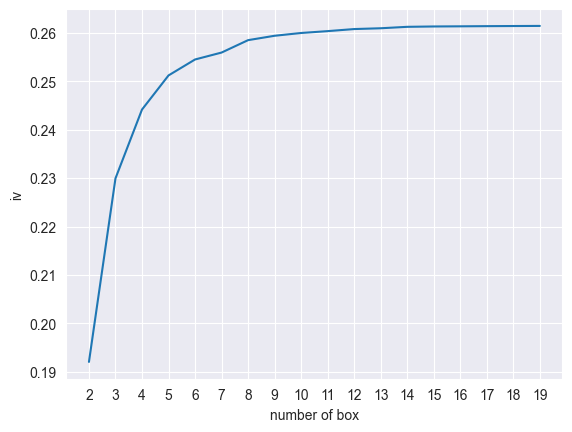

In [91]:
num_bins_ = numbins.copy()
import matplotlib.pyplot as plt
import scipy

iv = []
axisx = []
while len(num_bins_)>2:
    pvs = []
    # 获取num_bins_两两之间的卡方检验的置信度
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 返回chi2值，1返回p值
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        pvs.append(pv)
    # 通过p值进行处理，合并p值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
        num_bins_[i][0],
        num_bins_[i+1][1],
        num_bins_[i][2]+num_bins_[i+1][2],
        num_bins_[i][3]+num_bins_[i+1][3]
    )]

    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    iv.append(get_iv(bins_df))

plt.figure()
plt.plot(axisx,iv)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("iv")
plt.show()






# 5.5最佳分箱个数分箱，并验证分箱结果

In [101]:
def get_bin(num_bins_,n):
    while len(num_bins_) >n:
        pvs = []
        # 获取num_bins_两两之间的卡方检验的置信度
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            # 0 返回chi2值，1返回p值
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        # 通过p值进行处理，合并p值最大的两组
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3]
        )]
    return num_bins_



In [102]:
num_bins_ = numbins.copy()
afterbins = get_bin(num_bins_,4)

In [103]:
bins_df = get_woe(afterbins)

In [104]:
bins_df

,bin_min,bin_max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14467,1788,16255,0.155677,0.109997,0.148338,0.259582,-0.559576
1,36.0,52.0,34344,3064,37408,0.358263,0.081908,0.352149,0.444832,-0.233642
2,52.0,61.0,20525,1228,21753,0.208332,0.056452,0.210455,0.178281,0.165908
3,61.0,109.0,28191,808,28999,0.277728,0.027863,0.289058,0.117305,0.901848


In [105]:
num_bins_

[(21.0, 36.0, 14467, 1788),
 (36.0, 52.0, 34344, 3064),
 (52.0, 61.0, 20525, 1228),
 (61.0, 109.0, 28191, 808)]

# 5.6将最佳分箱个数的过程包装为函数

In [69]:
def graphforbestbin(df,x,y,n,q=20,graph = True):
    """


    :param df: 需要输入的数据
    :param x: 需要分箱的列名
    :param y: 分箱数据对应的标签
    :param n: 保留分箱的个数
    :param q: 初始化分箱的个数
    :param graph: 是否要画出iv图像
    :return:
    """
    global bins_df
    df = df[[x,y]].copy()
    df['qcut'],bins = pd.qcut(df[x], retbins=True, q=q, duplicates="drop")
    count_y0 = df.loc[df[y]==0].groupby(by='qcut').count()[y]
    count_y1 = df.loc[df[y]==1].groupby(by='qcut').count()[y]
    num_bins = [*zip(bins,bins[1:],count_y0,count_y1)]

    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i:i+2]=[(
                num_bins[i][0],
                num_bins[i][1],
                num_bins[i][2]+num_bins[i+1][2],
                num_bins[i][3]+num_bins[i+1][3]
            )]
            break
        else:
            continue

    def get_woe(num_bins):
        #通过num_bins 数据计算woe
        columns = ['bin_min','bin_max','count_0','count_1']
        df = pd.DataFrame(num_bins,columns = columns)
        df['total'] = df.count_0 +df.count_1
        df['percentage'] = df.total / df.total.sum()
        df['bad_rate'] = df.count_1 / df.total
        df['good%'] = df.count_0 / df.count_0.sum()
        df['bad%'] = df.count_1 /df.count_1.sum()
        df['woe'] = np.log(df['good%'] / df['bad%'])
        return df
    # 计算iv
    def get_iv(df):
        rate = df['good%'] - df['bad%']
        iv = np.sum(rate * df.woe)
        return iv

    iv = []
    axisx = []
    while len(num_bins)>n:
        pvs = []
        # 获取num_bins_两两之间的卡方检验的置信度
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            # 0 返回chi2值，1返回p值
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        # 通过p值进行处理，合并p值最大的两组
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3]
        )]
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        iv.append(get_iv(bins_df))
    if graph:
        plt.figure()
        plt.plot(axisx,iv)
        plt.xticks(axisx)
        plt.show()
    return bins_df






# 5.7对所有特征进行分箱选择

In [57]:
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
0,0,0.234997,49,0,1.339107,1500.00,14,0,2,0.0
1,0,0.002432,39,0,0.072861,11322.00,12,0,0,3.0
2,0,0.455464,61,2,0.254500,11500.00,15,0,0,0.0
3,0,0.485318,48,0,0.634126,10601.00,9,0,2,1.0
4,0,0.267373,63,0,498.000000,0.13,7,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
104410,0,0.616969,48,0,0.460000,3099.00,6,0,1,0.0
104411,0,0.022150,34,0,0.013240,1283.00,6,0,0,0.0
104412,0,0.553631,22,0,0.025806,929.00,2,0,0,0.0
104413,0,0.915415,57,0,0.359603,14896.00,9,0,2,1.0


In [70]:
for i in model_data.columns[1:-1]:
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=5,q=20,graph = False)

In [71]:
# 调整分箱
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                 "age":5,
                 "DebtRatio":4,
                 "MonthlyIncome":3,
                 "NumberOfOpenCreditLinesAndLoans":5}
#不能使用自动分箱的变量
hand_bins = {"NumberOfTimes90DaysLate":[0,1,2,17]
             ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
             ,"NumberOfDependents":[0,1,2,3]}
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [72]:
bins_of_col = {}
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col,"SeriousDlqin2yrs",n=auto_col_bins[col],q=20,graph = False)
    bins_list = sorted(set(bins_df['bin_min']).union(bins_df['bin_max']))
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
    bins_of_col.update(hand_bins)


In [73]:
for col in bins_of_col:
    print(col)

RevolvingUtilizationOfUnsecuredLines
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfDependents
age
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans


# 6 计算各箱的woe并映射到数据中

In [79]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df['cut'] = pd.cut(df[col],bins)
    #使用unstack()来将树状结构变成表状结构
    bins_df = df.groupby('cut')[y].value_counts().unstack()
    woe = bins_df['woe'] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe


In [80]:
woeall = {}
for col in bins_of_col:
    woeall[col]= get_woe(model_data,col,'SeriousDlqin2yrs',bins_of_col[col])


In [76]:
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.204]     1.206149
 (0.204, 0.346]    0.502268
 (0.346, 0.551]    0.029548
 (0.551, 0.844]   -0.610902
 (0.844, 1.0]     -1.203058
 (1.0, inf]       -2.109615
 dtype: float64,
 'NumberOfTimes90DaysLate': cut
 (-inf, 0.0]    0.376559
 (0.0, 1.0]    -1.961731
 (1.0, 2.0]    -2.682640
 (2.0, inf]    -3.184327
 dtype: float64,
 'NumberRealEstateLoansOrLines': cut
 (-inf, 0.0]   -0.241111
 (0.0, 1.0]     0.261163
 (1.0, 2.0]     0.188673
 (2.0, 4.0]    -0.096552
 (4.0, inf]    -0.967540
 dtype: float64,
 'NumberOfDependents': cut
 (-inf, 0.0]    0.158561
 (0.0, 1.0]    -0.125593
 (1.0, 2.0]    -0.208361
 (2.0, inf]    -0.353558
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.559576
 (36.0, 52.0]   -0.233642
 (52.0, 61.0]    0.165908
 (61.0, 65.0]    0.648474
 (65.0, inf]     1.040124
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.415]     0.145474
 (0.415, 0.658]   -0.231231
 (0.658, 5.0]     -0.573788
 (5.0, inf]        0.206274
 dtype: f

In [81]:
#将woe映射到原始数据中
#不希望覆盖掉原本的数据，创建一个新的DataFrame,索引和原始数据model_data
model_woe = pd.DataFrame(index = model_data.index)
# 将原始数据分箱后，按箱的结果将woe结构用map函数映射到数据中
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
model_woe['SeriousDlqin2yrs'] = model_data['SeriousDlqin2yrs']
model_woe.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,SeriousDlqin2yrs
0,0.502268,0.376559,0.188673,0.158561,-0.233642,-0.573788,-0.215936,-0.054983,0
1,1.206149,0.376559,-0.241111,-0.353558,-0.233642,0.145474,0.334576,0.180543,0
2,0.029548,0.376559,-0.241111,0.158561,0.165908,0.145474,0.334576,-0.054983,0
3,0.029548,0.376559,0.188673,-0.125593,-0.233642,-0.231231,0.334576,0.180543,0
4,0.502268,-1.961731,-0.241111,0.158561,0.648474,0.206274,0.757966,0.180543,0


# 7建模与模型验证

In [83]:
#处理测试集
vali_woe = pd.DataFrame(index = vali_data.index)

In [86]:
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe['SeriousDlqin2yrs'] = vali_data['SeriousDlqin2yrs']
vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,SeriousDlqin2yrs
0,1.206149,0.376559,0.261163,0.158561,1.040124,0.145474,-0.215936,0.180543,0
1,1.206149,0.376559,0.261163,-0.353558,-0.233642,0.145474,-0.215936,0.180543,0
2,1.206149,0.376559,-0.241111,0.158561,0.165908,0.145474,0.334576,0.180543,0
3,-1.203058,-1.961731,-0.241111,-0.125593,-0.559576,0.145474,-0.215936,-0.151218,0
4,1.206149,0.376559,-0.241111,0.158561,1.040124,0.145474,-0.215936,0.035166,0


In [94]:
# 建模
x = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
vali_x = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

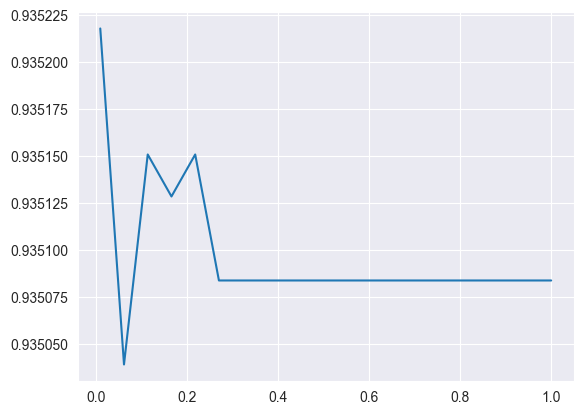

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

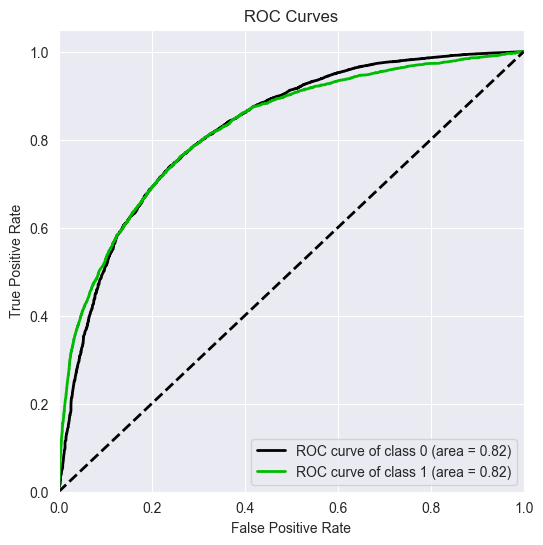

In [98]:
c_1 = np.linspace(0.01,1,20)
score = []
for i in c_1:
    lr = LR(solver='liblinear',C=i).fit(x,y)
    score.append(lr.score(vali_x,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()
#真正实现的迭代次数
lr.n_iter_
#roc曲线
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_x))
skplt.metrics.plot_roc(vali_y,vali_proba_df,plot_micro=False,figsize=(6,6),plot_macro=False)




In [99]:
# 制作评分卡
b = 20/np.log(2)
a = 600 + b*np.log(1/60)
base_score = a - b*lr.intercept_
base_score

array([557.99325876])

In [105]:
score_age = woeall['age'] *(-b*lr.coef_[0][1])

In [106]:
score_age

cut
(-inf, 36.0]   -11.753702
(36.0, 52.0]    -4.907579
(52.0, 61.0]     3.484848
(61.0, 65.0]    13.620985
(65.0, inf]     21.847457
dtype: float64

In [102]:
lr.coef_

array([[-0.73473812, -0.727966  , -0.65991465, -0.3479555 , -0.42785927,
        -0.88144542, -0.36034165,  0.26415949]])

In [104]:
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
0,0,0.234997,49,0,1.339107,1500.00,14,0,2,0.0
1,0,0.002432,39,0,0.072861,11322.00,12,0,0,3.0
2,0,0.455464,61,2,0.254500,11500.00,15,0,0,0.0
3,0,0.485318,48,0,0.634126,10601.00,9,0,2,1.0
4,0,0.267373,63,0,498.000000,0.13,7,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
104410,0,0.616969,48,0,0.460000,3099.00,6,0,1,0.0
104411,0,0.022150,34,0,0.013240,1283.00,6,0,0,0.0
104412,0,0.553631,22,0,0.025806,929.00,2,0,0,0.0
104413,0,0.915415,57,0,0.359603,14896.00,9,0,2,1.0


In [107]:
file = './data/scoredata.csv'
with open(file,'w') as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(x.columns):
    score = woeall[col] * (-b*lr.coef_[0][i])
    score.name  = "score"
    score.index.name = col
    score.to_csv(file,header= True,mode='a')